In [1]:
import json
import pandas as pd
import numpy as np


# Introduction
The dataset was downloaded from https://www.kaggle.com/datasets/rmisra/news-category-dataset/data.

The file is available as a .json file. However, the entries are a list of dictionaries, with 1 dictionary per line.

As suggested by Z. Fried in the discussion section, try/excepts were required to successfully read in the data, as a list of dictionaries.

This gives a dataset with 12.9K entries.

In [2]:
# https://www.kaggle.com/datasets/rmisra/news-category-dataset/discussion/191283#2555580
data = []

# If using Google Colab, upload .json file into root content directory (as per path below) during working session .
# If using a local Jupyter Notebook, edit the path below to point to your working folder.
for line in open('/content/News_Category_Dataset_v3.json', 'r'):
  try:
    data += [json.loads(line)]
  except:
    continue # Skip errors in JSON file.

In [3]:
data[:2] # view data samples

[{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9',
  'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters',
  'category': 'U.S. NEWS',
  'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
  'authors': 'Carla K. Johnson, AP',
  'date': '2022-09-23'},
 {'link': 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe',
  'headline': 'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video',
  'category': 'U.S. NEWS',
  'short_description': "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
  'authors': 'Mary Papenfuss',
  'date': '2022-09-23'}]

In [5]:
# Convert to pandas dataframe
df = pd.DataFrame(data)
len(df) # 15619 rows

15619

In [6]:
df.head(2)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23


# Dataset composition

In [49]:
# Check value counts of categories and percentage composition of dataset
print(f"Number of categories: {df['category'].nunique()}\n")

df_count = df.category.value_counts().rename_axis('category').reset_index(name='count')
df_count['percent'] = ((df_count['count']/df_count['count'].sum())*100).round(2)
df_count

Number of categories: 32



,category,count,percent
0,POLITICS,5383,34.46
1,ENTERTAINMENT,2718,17.40
2,WORLD NEWS,1562,10.00
3,U.S. NEWS,1377,8.82
4,COMEDY,595,3.81
5,SPORTS,523,3.35
6,BLACK VOICES,405,2.59
7,QUEER VOICES,404,2.59
8,MEDIA,369,2.36
9,CRIME,309,1.98


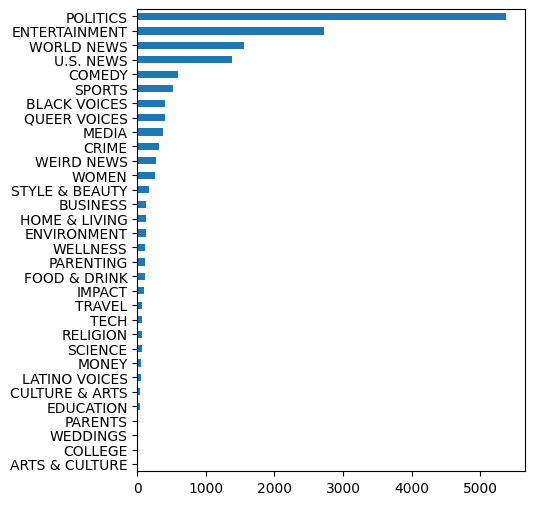

In [53]:
df['category'].value_counts().sort_values().plot(kind='barh', figsize=(5,6)); # adjust figsize else y labels too close

This is an extremely imbalanced dataset.

There are 4 major categories that account for more than 72% of the dataset:
- Politics (34.6%)
- Entertainment (17.1%)
- World News (10.7%)
- U.S. News (10.7%)

The remaining 28% of the data consists of 22 minor categories.

The minority categories have 1 - 595 learning examples.
Possible ways to proceed with training a classifier model:

(1) dropping categories using various category size thresholds (e.g. <500)

(2) undersampling majority classes (Politics, Entertainment)

(3) oversampling minority classes

(4) consolidating some or all minority classes into fewer classes (if dropping them altogether is undesirable e.g. rounded coverage of news data is required)

In [58]:
# Sample some of the categories for a feel of the data
p = df.loc[df['category']=='TECH'] # POLITICS BUSINESS
p.sample(5)

,link,headline,category,short_description,authors,date,length_headline,length_desc
778,https://www.huffpost.com/entry/ex-twitter-ceo-...,Ex-Twitter CEO Dings Elon Musk For Attacks On ...,TECH,A one-sided feud between Musk and Vijaya Gadde...,Sara Boboltz,2022-04-27,11,12
12081,https://www.huffingtonpost.com/entry/elon-musk...,"Elon Musk Pulls Tesla, SpaceX Facebook Pages I...",TECH,He also deleted his personal profile.,Ryan Grenoble,2018-03-23,11,6
12257,https://www.huffingtonpost.com/entry/whatsapp-...,WhatsApp Co-Founder Says People Should Delete ...,TECH,Facebook bought WhatsApp for $19 billion in 2014.,Josh Butler,2018-03-21,7,8
10407,https://www.huffingtonpost.com/entry/facebook-...,"From Cursing To Murder, Facebook Opens Up Abou...",TECH,"For years, Facebook had “community standards” ...","David Ingram, Reuters",2018-04-24,12,22
11704,https://www.huffingtonpost.com/entry/facebook-...,Facebook Employees Are Outraged About -- Wait ...,TECH,The company's reaction to a leaked internal me...,Ryan Grenoble,2018-03-30,14,14


There is some overlap in news content among categories, e.g. some business articles may be about technology companies and vice versa.

It might be a worthwhile to consolidate such overlapping categories into a single category to prevent inconsistent learning and 'confused' models, especially where the objective of the model is to classify only to a single label or category.

# Headline and description lengths

In [9]:
def string_length(s, sep=None):
  split_ls = s.split(sep)
  return len(split_ls)

In [10]:
df.loc[:, 'length_headline'] = df['headline'].apply(string_length)

In [11]:
df.loc[:,'length_desc'] = df['short_description'].apply(string_length)

In [12]:
df.head(2)

,link,headline,category,short_description,authors,date,length_headline,length_desc
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,11,29
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,13,28


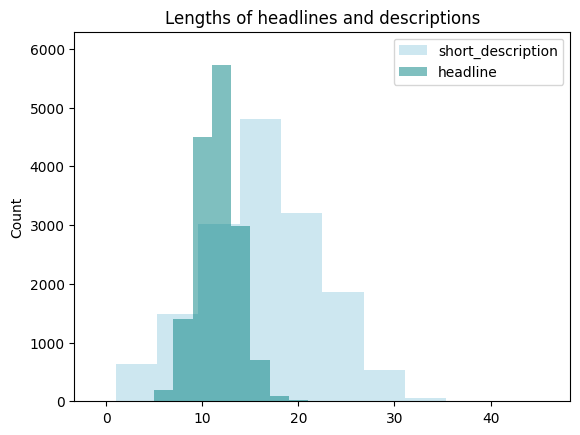

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(df['length_desc'], color='lightblue', alpha=0.6, label='short_description')
ax.hist(df['length_headline'], color='teal', alpha=0.5, label='headline')
ax.legend()
ax.set(title='Lengths of headlines and descriptions', ylabel='Count')
ax.margins(0.1)
# ax.set_ylim(bottom=0)

plt.show()

Most of the text entries are 10 - 20 words in length (inclusive of any numbers). They are quite clean text. Not necessary to clean further.

In [64]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15619 entries, 0 to 15618
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               15619 non-null  object        
 1   headline           15619 non-null  object        
 2   category           15619 non-null  object        
 3   short_description  15619 non-null  object        
 4   authors            15619 non-null  object        
 5   date               15619 non-null  datetime64[ns]
 6   length_headline    15619 non-null  int64         
 7   length_desc        15619 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 976.3+ KB


In [66]:
# Save EDA dataset
df.to_csv("/content/data_EDA.csv", index=False)

# Data pre-filter: minimum number of entries

In [65]:
# Function to keep the categories with a minimum number (n) of entries
cat_counts = df['category'].value_counts()

def cat_dropper(df, n):
  '''
  Takes in a dataframe, and a minimum number (n) of entries required for categories
  Drops rows belonging to categories that have less than n entries in the dataframe
  Returns dataframe with categories that have n or more entries

  '''
  df1 = df.loc[df['category'].isin(cat_counts[cat_counts >= n].index)]
  print(f"Number of rows dropped = {len(df)- len(df1)}")
  return df1

In [60]:
df1 = cat_dropper(df, 500)
df1.head(2)

Number of rows dropped = 3461


,link,headline,category,short_description,authors,date,length_headline,length_desc
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,11,29
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,13,28


In [62]:
df1.category.value_counts()

POLITICS         5383
ENTERTAINMENT    2718
WORLD NEWS       1562
U.S. NEWS        1377
COMEDY            595
SPORTS            523
Name: category, dtype: int64

At this point of experimentation, we decide to drop minor categories with less than 500 records. There is still imbalance in the dataset, albeit less pronounced. We can explore sampling techniques (e.g. random oversampling) to deal with this.


In [67]:
# Export selected columns of processed dataset
df2 = df1[['headline', 'category', 'short_description', 'date', 'length_headline', 'length_desc']]

df2.to_csv("/content/data_processed_6cats.csv", index=False)